##基礎演習S 後半第4回

NE21-1228F
鈴木　拓己

In [1]:
# 参考：インストール済みパッケージ
p <- installed.packages()
rownames(p)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

In [ ]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")
# 確認（グラフでの日本語）
dat <- cars
head(dat, 3)
colnames(dat) <- c("速度","距離")
plot(dat)

In [ ]:
# ライブラリ
library(tidyverse)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: doParallel

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘doParallel’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: foreach


Attaching packa

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



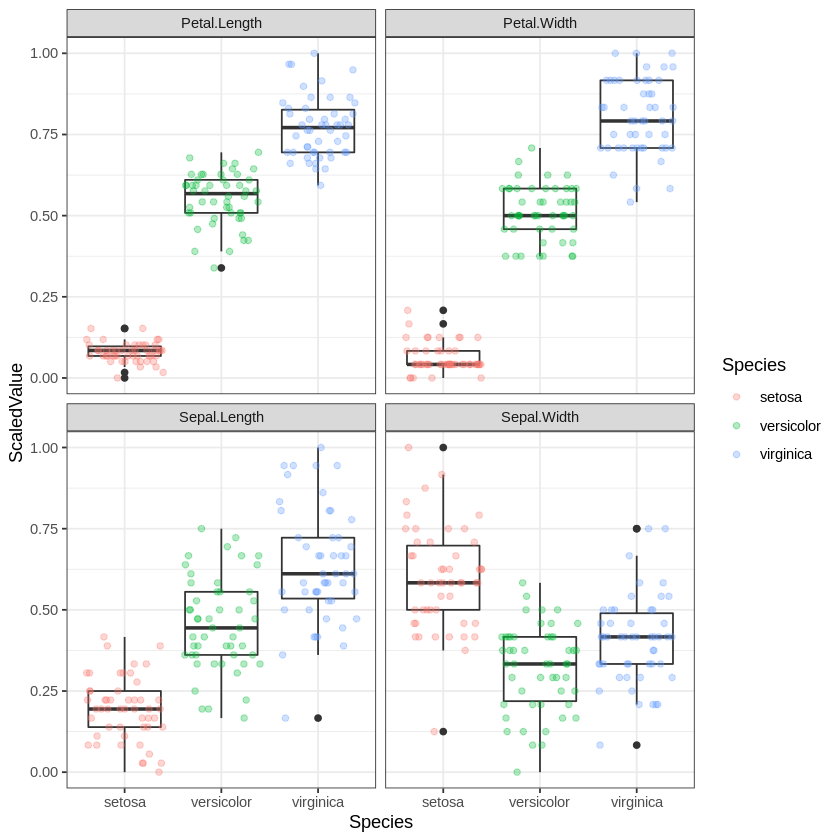

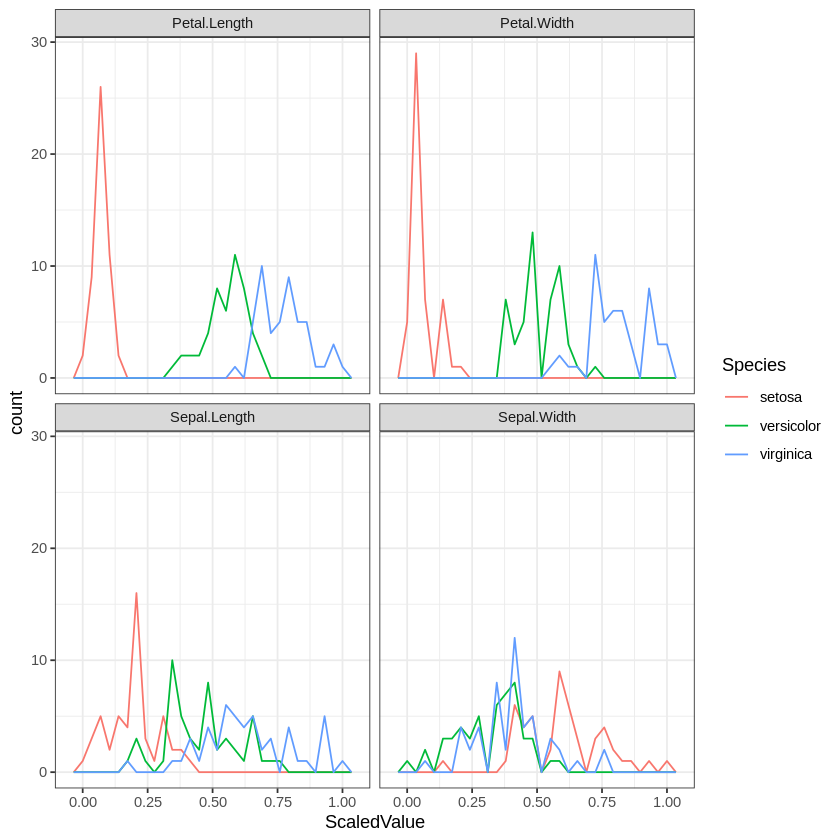

In [4]:
# package読み込み
if(!require("caret")){install.packages("caret")}; library(caret)
if(!require("doParallel")){install.packages("doParallel")}; library(doParallel)
if(!require("tictoc")){install.packages("tictoc")}; library(tictoc)
library(tidyverse)
#----------------------------
# データ読み込み
#summary(iris)
dat <- iris
y <- iris$Species
#y <- data.frame(Species=dat$Species)
#----------------------------
# データ視覚化
df <- 
  dat %>%
  pivot_longer(col = -Species, names_to = "key", values_to = "value") %>%
  group_by(key) %>% 
  mutate(ScaledValue=(value-min(value))/(max(value)-min(value))) # min-max正規化
summary(dat)
# 箱ひげ図（box plot）
ggplot(df,aes(x=Species,y=ScaledValue))+
  theme_bw()+
  geom_boxplot()+
  geom_jitter(aes(color=Species),alpha=.3)+
  facet_wrap(~key)
# 度数分布多角形（frequency polygon）
ggplot(df,aes(color=Species,x=ScaledValue))+
  theme_bw()+
  geom_freqpoly()+
  facet_wrap(~key)
#----------------------------
# データ分割（訓練データとテストデータ）
set.seed(123)     # 再現性のため乱数種設定
id <- createDataPartition(y=dat[,5], p=0.7, list=FALSE)
# 訓練データ
dat_train <- dat[id,]; y_train <- y[id]
# テストデータ
dat_test <- dat[-id,]; y_test <- y[-id]
#----------------------------
# 数値データの欠損値補完　なし
# missingdata_model <- preProcess(as.data.frame(X_train), method='knnImpute')
# X_train <- predict(missingdata_model, newdata = X_train)
# X_test <- predict(missingdata_model, newdata = X_test)
#----------------------------
# 数値データの正規化・標準化
pp <- preProcess(dat_train[,-5], method = c("center", "scale"))
dat_train[,-5] <- predict(pp, newdata = dat_train[,-5])
dat_test[,-5] <- predict(pp, newdata = dat_test[,-5])

### Ex.4-4：決定木（decision tree）
##### irisデータ，rpartパッケージ

In [26]:
# パッケージインストールと事前確認
if(!require("rpart")){install.packages("rpart")}; library(rpart)
if(!require("rpart.plot")){install.packages("rpart.plot")}; library(rpart.plot)
if(!require("partykit")){install.packages("partykit")}; library(partykit)

In [32]:
# ハイパーパラメータのチューニング範囲（グリッド）指定
# gridを指定しないこともできる

grid <- expand.grid(alpha = 1, lambda = c(0, 10^(-4:2)))

# 検証方法設定

tc <-  trainControl(method = "repeatedcv",
          number = 10,          # 10-fold
          repeats = 3,          # 3回繰り返す
          selectionFunction = "best")

# 学習（モデル構築）
set.seed(123)

cores = detectCores() 
cl <- makePSOCKcluster(cores)   # PCのコア数（並列化）
registerDoParallel(cl)
#-----
tic()
model <- train(Species~., data=dat_train,
#              method="rpart", trControl=tc, tuneGrid=grid)
             method="rpart", trControl=tc)    # grid指定しない場合
toc()
stopCluster(cl)

6.733 sec elapsed


[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

,cp
,<dbl>
1,0


n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

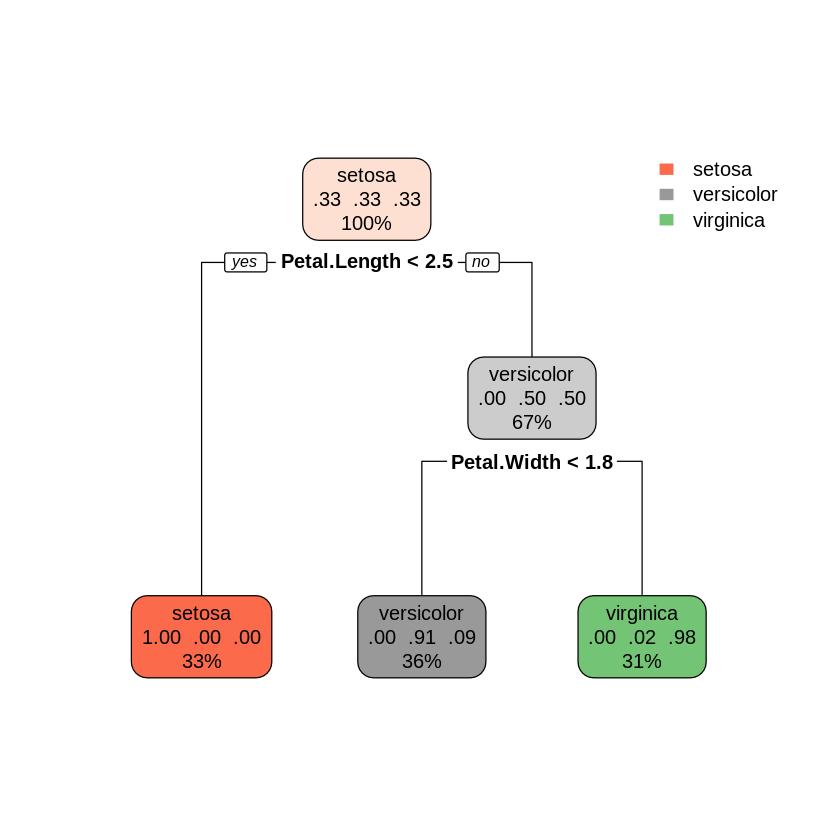

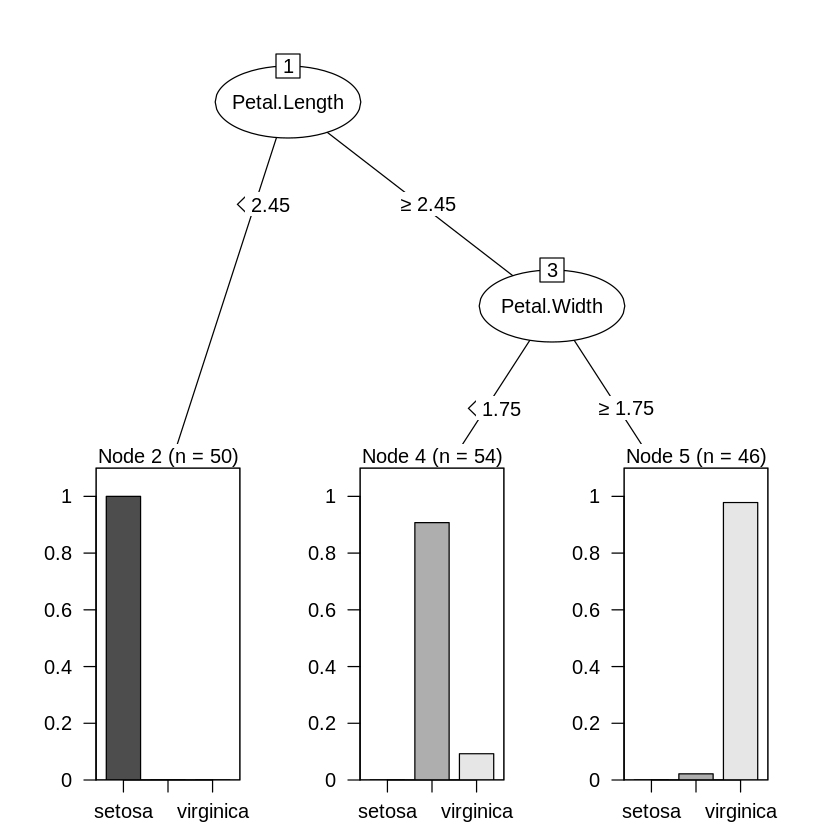

CART 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9422222  0.9133333
  0.44  0.7866667  0.6800000
  0.50  0.3333333  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


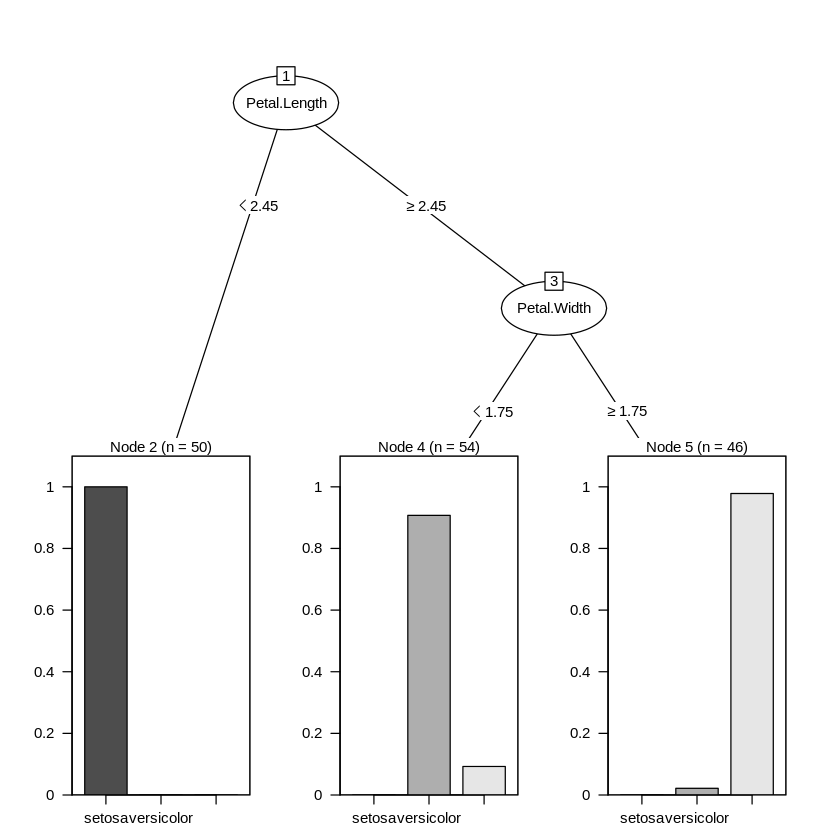

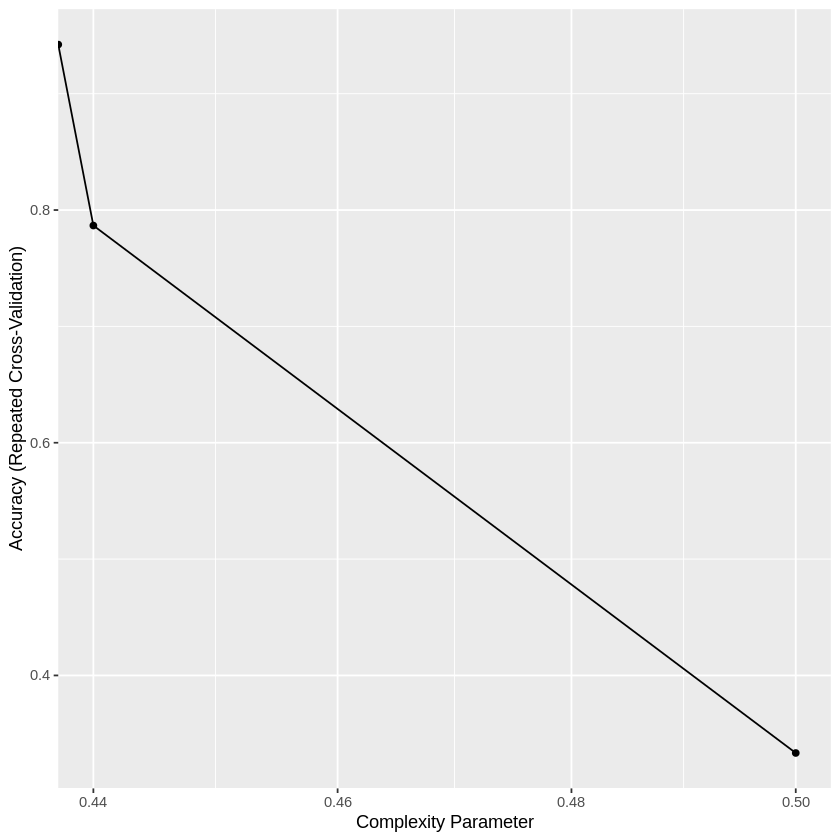

In [43]:
# 検証結果確認(1)
names(model)

#妥当なハイパーパラメータ
model$bestTune 

#最終モデル
model$finalModel

#モデルの視覚化1 rpart.plot関数
library(rpart.plot)
require(rpart.plot)
rpart.plot(model$finalModel)

# # モデルの視覚化2 plotとas.party関数
require(partykit)
plot(as.party(model$finalMode))
plot(as.party(model$finalMode), gp = gpar(fontsize = 9))

# # モデル概要
 model

# # ハイパーパラメータとパフォーマンス
 ggplot(model) + scale_x_log10()


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         34         2
  virginica       0          1        33

Overall Statistics
                                          
               Accuracy : 0.9714          
                 95% CI : (0.9188, 0.9941)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9571          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9714           0.9429
Specificity                 1.0000            0.9714           0.9857
Pos Pred Value              1.0000            0.9444           0.9706
Neg Pred Value              1.0000            0.9855           0.9718
P

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

Overall Statistics
                                         
               Accuracy : 0.9333         
                 95% CI : (0.8173, 0.986)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9            
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           0.8667
Specificity                 1.0000            0.9333           0.9667
Pos Pred Value              1.0000            0.8750           0.9286
Neg Pred Value              1.0000            0.9655           0.9355
Prevalence

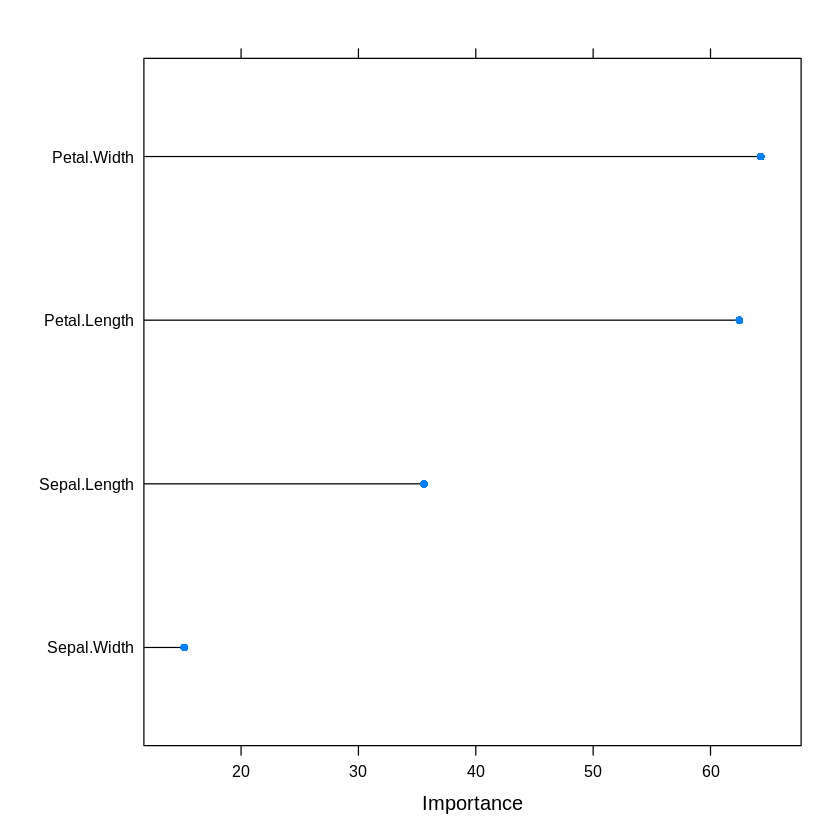

In [36]:
# 検証結果確認(2)
# 変数重要度
varImp(model, scale = F) %>% plot()

# パフォーマンス（予測・精度確認）
pred_train <- predict(model, newdata = dat_train) %>% as.factor() # 5列目あっても可
pred_test <- predict(model, newdata = dat_test) %>% as.factor()


# 混同行列（訓練）
confusionMatrix(data = pred_train, y_train)


# 混同行列（テスト）
confusionMatrix(data = pred_test, y_test) 



5.398 sec elapsed


[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

,cp
,<dbl>
1,0


CART 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.00  0.9422222  0.9133333
  0.44  0.7866667  0.6800000
  0.50  0.3333333  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

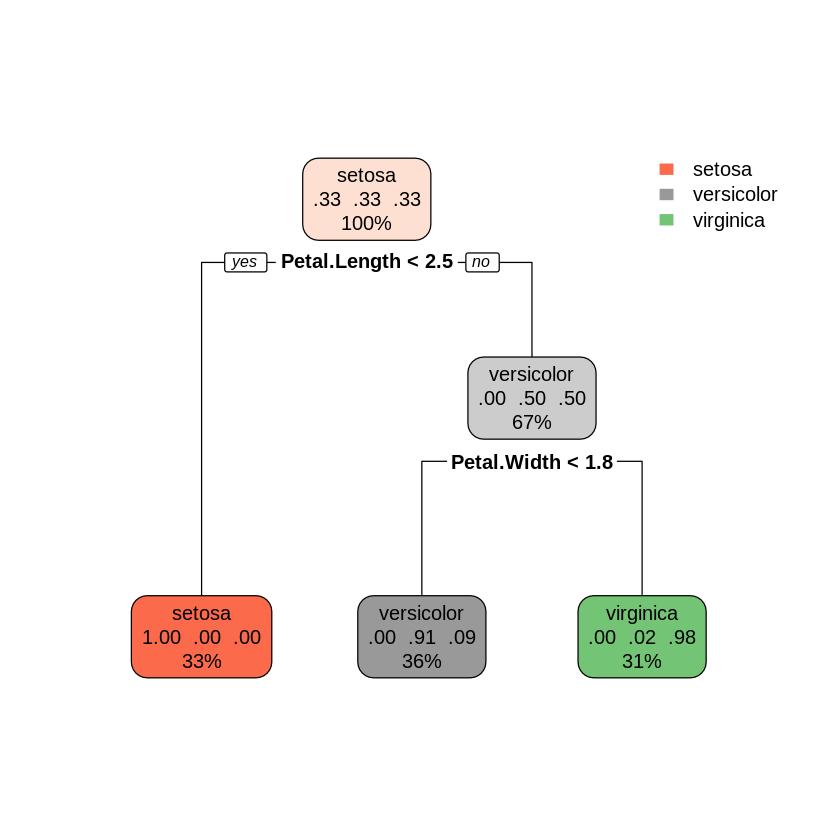

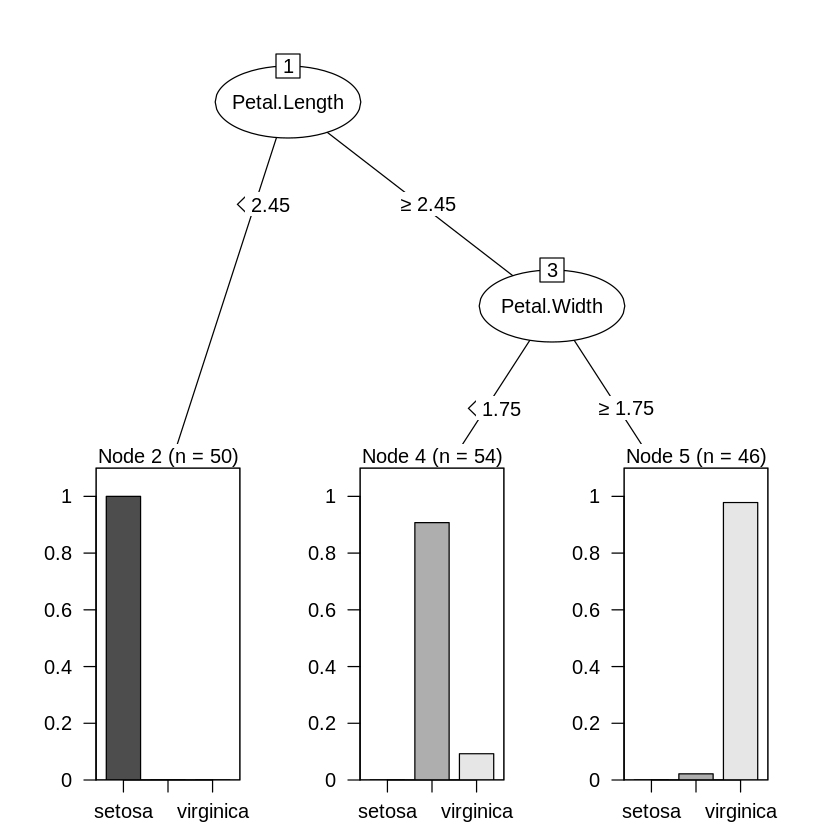

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


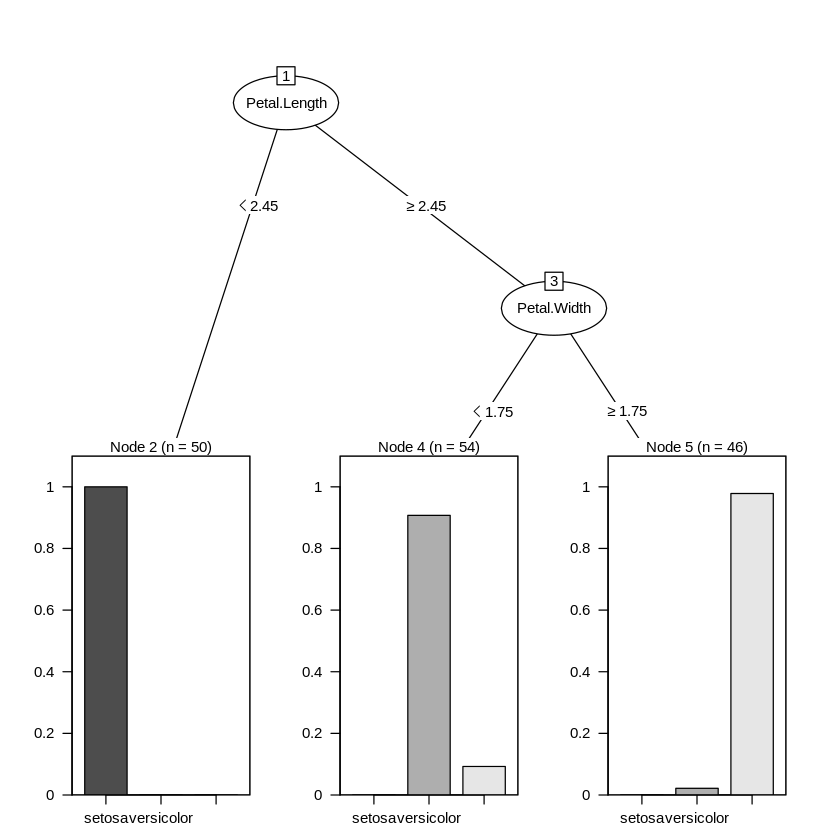

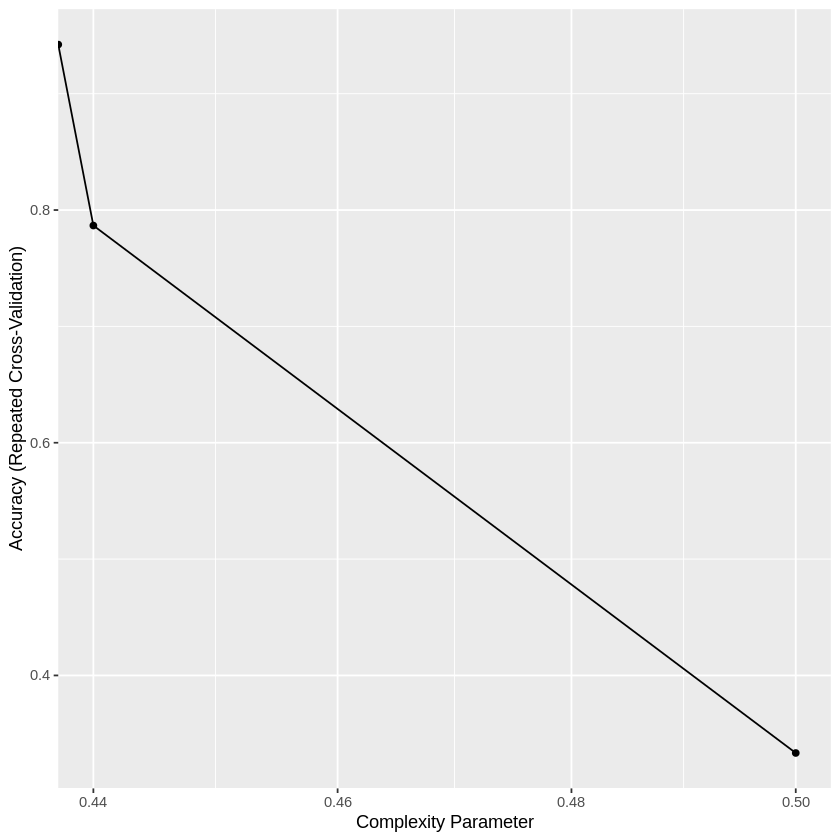

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45

Overall Statistics
                                         
               Accuracy : 0.96           
                 95% CI : (0.915, 0.9852)
    No Information Rate : 0.3333         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.94           
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9800           0.9000
Specificity                 1.0000            0.9500           0.9900
Pos Pred Value              1.0000            0.9074           0.9783
Neg Pred Value              1.0000            0.9896           0.9519
Prevalence

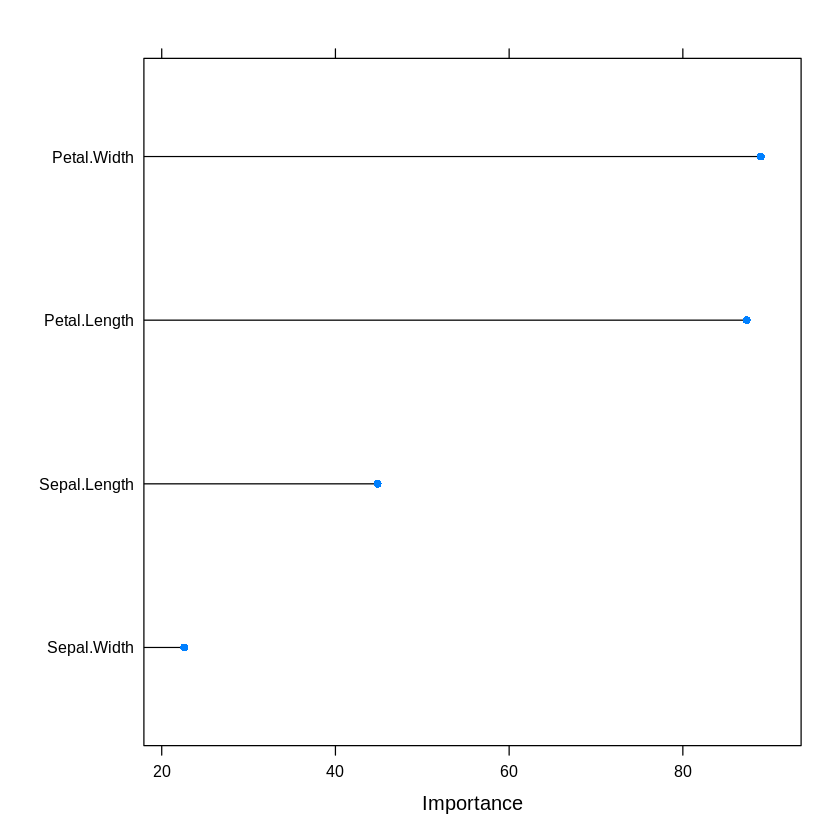

In [42]:
# 最終モデル取得（全データ使用）

# 検証
set.seed(123)
set.seed(123)
cores = detectCores() 
cl <- makePSOCKcluster(cores)     # PCのコア数（並列化）
registerDoParallel(cl)
# -----
tic()
model <- train(Species~., data=dat,      # 全データ使用
              method="rpart", trControl=tc)
toc()
stopCluster(cl)

# 検証結果確認(1)
names(model)

# 妥当なハイパーパラメータ
model$bestTune

# モデル概要
model
# 最終モデル
model$finalModel

#モデルの視覚化1 rpart.plot関数
library(rpart.plot)
require(rpart.plot)
rpart.plot(model$finalModel)

# # モデルの視覚化2 plotとas.party関数
require(partykit)
plot(as.party(model$finalMode))
plot(as.party(model$finalMode), gp = gpar(fontsize = 9))

# ハイパーパラメータとパフォーマンス
ggplot(model) + scale_x_log10()

# 検証結果確認(2)
# 変数重要度
varImp(model, scale = F) %>% plot()


# パフォーマンス（予測・精度）確認
pred <- predict(model, newdata = dat) %>% as.factor()
confusionMatrix(data = pred, y)     # 混同行列